# Text Mining and Search Project

### Master's Degree in Data Science (A.Y. 2023/2024)
University of Milano - Bicocca

- Francesca Corvino (ID 898058)
- Enrico Mannarino (ID 850859)
- Christian Persico (ID 829558)

Core tasks to accomplish:

- **Text classification** (labels = SCORE - int64)
- **Text summarization**

Brief **description**: 
This dataset consists of reviews of fine foods from Amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plaintext review. We also have reviews from all other Amazon categories. 


- product/productId: asin, e.g. amazon.com/dp/B001E4KFG0
- review/userId: id of the user, e.g. A3SGXH7AUHU8GW
- review/profileName: name of the user
- review/helpfulness: fraction of users who found the review helpful
- review/score: rating of the product
- review/time: time of the review (unix time)
- review/summary: review summary
- review/text: text of the review 

## Importing and installing libraries and dependencies

In [ ]:
%%capture
!pip install contractions demoji emoji stopwords langdetect deep_translator

In [1]:
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import re
import contractions
import demoji
import nltk
import unicodedata
from langdetect import detect
from deep_translator import GoogleTranslator
import string
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
import ast

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data exploration and understanding

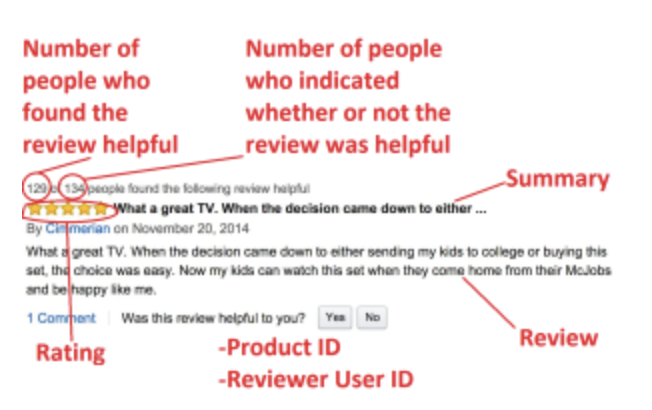

In [ ]:
Image("/work/Screenshot 2023-11-14 alle 11.16.54.png") 

In [ ]:
df = pd.read_csv('Reviews.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
print(df.loc[:10][['Text']])

                                                 Text
0   I have bought several of the Vitality canned d...
1   Product arrived labeled as Jumbo Salted Peanut...
2   This is a confection that has been around a fe...
3   If you are looking for the secret ingredient i...
4   Great taffy at a great price.  There was a wid...
5   I got a wild hair for taffy and ordered this f...
6   This saltwater taffy had great flavors and was...
7   This taffy is so good.  It is very soft and ch...
8   Right now I'm mostly just sprouting this so my...
9   This is a very healthy dog food. Good for thei...
10  I don't know if it's the cactus or the tequila...


In [ ]:
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df['Time']

0        2011-04-27
1        2012-09-07
2        2008-08-18
3        2011-06-13
4        2012-10-21
            ...    
568449   2011-03-09
568450   2012-03-09
568451   2012-02-21
568452   2012-03-13
568453   2012-05-31
Name: Time, Length: 568454, dtype: datetime64[ns]

In [ ]:
df['Time'].min(), df['Time'].max()

(Timestamp('1999-10-08 00:00:00'), Timestamp('2012-10-26 00:00:00'))

In [ ]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score
count,568454.000000,568454.000000,568454.00000,568454.000000
mean,284227.500000,1.743817,2.22881,4.183199
std,164098.679298,7.636513,8.28974,1.310436
min,1.000000,0.000000,0.00000,1.000000
25%,142114.250000,0.000000,0.00000,4.000000
50%,284227.500000,0.000000,1.00000,5.000000
75%,426340.750000,2.000000,2.00000,5.000000
max,568454.000000,866.000000,923.00000,5.000000


In [ ]:
df.nunique()

Id                        568454
ProductId                  74258
UserId                    256059
ProfileName               218416
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295742
Text                      393579
dtype: int64

In [ ]:
pd.DatetimeIndex(df['Time']).year.value_counts().sort_values()

1999         6
2001        13
2000        32
2002        73
2003       132
2004       561
2005      1335
2006      6671
2007     22300
2008     34163
2009     55326
2010     85884
2011    163299
2012    198659
Name: Time, dtype: int64

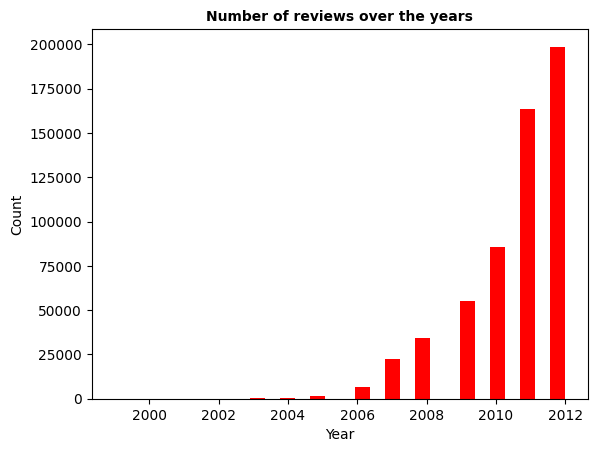

In [ ]:
plt.hist(df["Time"].dt.year, bins = 30, color='red')
plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Number of reviews over the years', fontweight='bold', fontsize=10)
plt.show()

Inspecting for missing values:

In [ ]:
missing_values = df.isnull().sum()
missing_values

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

By checking the missing values, we note that we have missing values for the columns:
+ ProfileName
+ Summary

As far as ProfileName is concerned, we are talking about an id that is not used for the analysis.
We can therefore keep the missing value without making any changes to the dataset.

Summary, on the other hand, is a variable to be considered as, although Text is significant, it may contain keywords not present in the other column.

A possible future development would be to create a new column with the concatenation of these two, so we proceed to replace the missing value with an empty string.

In [ ]:
df['Summary'] = df['Summary'].fillna('')

Let's check if it worked:

In [ ]:
missing_values = df.isnull().sum()
missing_values

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    0
Text                       0
dtype: int64

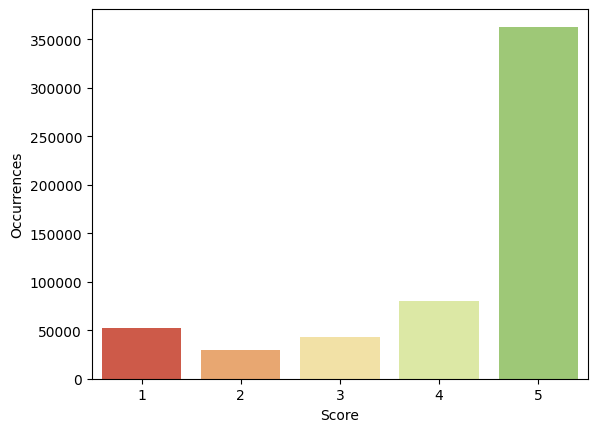

In [ ]:
sns.countplot(x = 'Score', data = df, palette=sns.color_palette("RdYlGn"))

plt.xlabel('Score')
plt.ylabel('Occurrences')
plt.show()

The vast majority of reviews have 5 stars, the problem of unbalanced classes will have to be addressed during the grading process!

We now proceed to check for **duplicate rows**.
Due to the nature of the dataset, a row is considered duplicate if it contains the same values for the Score and Text columns.

(26 people - different userID - copied the same text and summary from other people)

In [ ]:
df = df.drop_duplicates(subset=['Score', 'Text'])
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...


By eliminating duplicate values, we go from 568454 observations in the starting dataset to 393675 (**174779 duplicates**).

At first glance, the summary and text columns appear to contain classic strings.
Let us try to check whether html or url are present:

## Normalization functions

In [ ]:
def remove_links(text):
  remove_https = re.sub(r'http\S+', '', str(text))
  remove_com = re.sub(r"www\S+", '', str(remove_https))
  return remove_com

In [ ]:
def remove_htmls(text):
    remove_html = re.sub(r'<[^>]+>', '', str(text))
    return remove_html

In [ ]:
def remove_emojis_and_ascii_emojis(text):
    #demoji.download_codes()
    text = demoji.replace(text, '')

    # Definizione degli elementi degli ASCII emoji
    text_emoji = [":'-D", ":'D", ":,-D", ":,D", ":-D", ":-o", ":-O", ":-P", ":-S", ":-Z",
                  ":D", ":o", ":O", ":P", ":s", ":z", "B-)", "o:)", "O:)", "O:-)", "o:-)",
                  "X-)", "x-)"]

    # Rimuove gli ASCII emoji
    for emoji in text_emoji:
        text = text.replace(emoji, '')

    return text

In [ ]:
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str) # separa il carattere "à" in "a`" 
    # u indica che la stringa "" è in formato unicode
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

Show examples of problematic accents and parts of text and explain the importance of their removal if present
Who is NFKD? 

Remove accents by replacing them with the respective base letter to cover the case where reviewers write the same word but in both accented and unaccented form.

In summary, NFD decomposes characters into their base characters and diacritical marks, while NFKD goes a step further by also applying compatibility decompositions. The choice between NFD and NFKD depends on the specific requirements of your application. NFKD might be more aggressive in normalizing and can be useful in situations where you want to ensure a higher degree of compatibility between different representations of the same text.

In [ ]:
def remove_punct_num(text):
    text = re.sub(r'[^A-Za-z\s]', '', str(text))
    return text

In [ ]:
def remove_whitespaces(text):
    remove_spaces = re.sub(r'\s\s+', ' ', str(text)).strip()
    return remove_spaces

In [ ]:
def normalization(raw_text):
    lower_text = raw_text.lower()
    no_links = remove_links(lower_text)
    no_htmls = remove_htmls(no_links)
    no_emoji = remove_emojis_and_ascii_emojis(no_htmls)
    no_accents = remove_accents(no_emoji)
    no_punct_num = remove_punct_num(no_accents)
    norm_text = remove_whitespaces(no_punct_num)
    return norm_text

### Normalization application

In [ ]:
df.loc[:, 'Text'] = df['Text'].apply(normalization)

# df['Text'] = df['Text'].apply(lambda x: normalization(x))

## Saving results in a CSV file

In [ ]:
df.to_csv('normalized_reviews.csv', index=False)

In [ ]:
norm_df = pd.read_csv('normalized_reviews.csv')
norm_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,great taffy at a great price there was a wide ...
...,...,...,...,...,...,...,...,...,...,...
393670,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,great for sesame chickenthis is a good if not ...
393671,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,im disappointed with the flavor the chocolate ...
393672,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,these stars are small so you can give of those...
393673,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,these are the best treats for training and rew...


### Detection of non english reviews

In [ ]:
norm_df['Language'] = norm_df['Text'].astype(str).apply(detect)

In [ ]:
norm_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Language
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,i have bought several of the vitality canned d...,en
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,product arrived labeled as jumbo salted peanut...,en
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",this is a confection that has been around a fe...,en
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,if you are looking for the secret ingredient i...,en
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,great taffy at a great price there was a wide ...,en
...,...,...,...,...,...,...,...,...,...,...,...
393670,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,great for sesame chickenthis is a good if not ...,en
393671,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,im disappointed with the flavor the chocolate ...,en
393672,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,these stars are small so you can give of those...,en
393673,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,these are the best treats for training and rew...,en


In [ ]:
norm_df.to_csv('normalized_lang_reviews.csv', index=False)

In [ ]:
norm_df = pd.read_csv("normalized_lang_reviews.csv")

## Pre-Processing

### Check for nan values and remove the rows

In [ ]:
print("The nan values in the column Text is: " + str(norm_df['Text'].isna().sum()))
print("Length df before removing nan values: " + str(len(norm_df)))
norm_df = norm_df.dropna(subset=['Text'])
print("Length df after removing nan values: " + str(len(norm_df)))

The nan values in the column Text is: 0
Length df before removing nan values: 393670
Length df after removing nan values: 393670


### Check for non-eng reviews and translation function

In [ ]:
norm_df[norm_df['Language'] != 'en'][['Text', 'Language']]

,Text,Language
1938,my yr old granddaughter and i cannot get enoug...,cy
4132,muy buen producto por su tamantildeo uno lo pu...,es
6586,yo soy corredora y he probado muchos tipos de ...,es
7693,el gastroenterologo pediatra recomendo este ti...,es
9468,muy buen producto el cierre del empaque es fan...,es
...,...,...
385693,i make and drink lavazza qualita rossa espress...,it
386317,these taste like sweet and salty seaweed nori ...,af
389085,banana banana banana banana banana banana bana...,tl
392094,ich trinke seit mindestens zehn jahren gerolst...,de


In [ ]:
norm_df.loc[139812]['Text']

'este es el mejor aceite que he usado desde que cocino comida asiatica el lijero y no se quema facilmente cuando pones comida a temperatura muy alta y tiene un olor que despierta tu apetito inmediatamentellego perfectamente empacado y felicito a los distribuidores por tener este producto de primera calidad'

Translation function:

In [ ]:
def translate_reviews(text):
        translator = GoogleTranslator()
        translated_text = translator.translate(text, source='auto', target='en')
        return translated_text.lower() # HO NOTATO CHE QUANDO TRADUCE METTE LA PRIMA LETTERA MAIUSCOLA!

In [ ]:
print(norm_df.loc[139812]['Text'])
print(translate_reviews(norm_df.loc[139812]['Text']))

este es el mejor aceite que he usado desde que cocino comida asiatica el lijero y no se quema facilmente cuando pones comida a temperatura muy alta y tiene un olor que despierta tu apetito inmediatamentellego perfectamente empacado y felicito a los distribuidores por tener este producto de primera calidad
this is the best oil i have used since i cooked asian food and it does not burn easily when you put food at a very high temperature and it has a smell that awakens your appetite immediately. it arrived perfectly packaged and i congratulate the distributors for having this top quality product.


Apply the function only on non-eng texts:

In [ ]:
norm_df.loc[norm_df['Language'] != 'en', 
                    'Text'] = norm_df[norm_df['Language'] != 'en']['Text'].apply(translate_reviews)

norm_df.loc[norm_df['Language'] != 'en', 'Text']

1938      my yr old granddaughter and i cannot get enoug...
4132      very good product for its size you can take it...
6586      i am a runner and i have tried many types of p...
7693      the pediatric gastroenterologist recommended t...
9468      very good product, the closure of the packagin...
                                ...                        
385693    i make and drink lavazza qualita rossa espress...
386317    these taste like sweet and salty seaweed nori ...
389085    banana banana banana banana banana banana bana...
392094    i've been drinking gerolsteiner sparkling wate...
393344    poor value very poor bad or no tastepoor value...
Name: Text, Length: 171, dtype: object

### Decontractions

In [ ]:
def decontractions(string):
    return contractions.fix(re.sub(r"can\t",
                                   "can not",
                                   (re.sub(r"cannot",
                                           "can not",
                                           string))))

In [ ]:
print("THE PHRASE: " + "i dont or i wont ")
print("BECOMES: " + decontractions("i dont or i wont "))

THE PHRASE: i dont or i wont 
BECOMES: i do not or i will not 


In [ ]:
norm_df['Text'] = norm_df['Text'].apply(decontractions)

In [ ]:
norm_df['Text'][1998]

'my family absolutely loves this pancake and waffle mix the texture and taste is the best out there especially when using our waffle maker you can add fruit and other items to the mix and be as creative as you wish your price is great and delivery cannot be beat we recommend it to everyone'

### Tokenization and stopwords removal

In [ ]:
stop_words = stopwords.words('english')
stop_words.remove('not')
stop_words.append('would')
stop_words.append('product')
stop_words.append('amazon')

def remove_stopwords(text):
  tokenized_text = WordPunctTokenizer().tokenize(text) 
  tokenized_text_without_stopwords = [] 
  for token in tokenized_text: 
    if token not in stop_words: 
      tokenized_text_without_stopwords.append(token) 
  return tokenized_text_without_stopwords 

Length before and after the removal of stopwords:

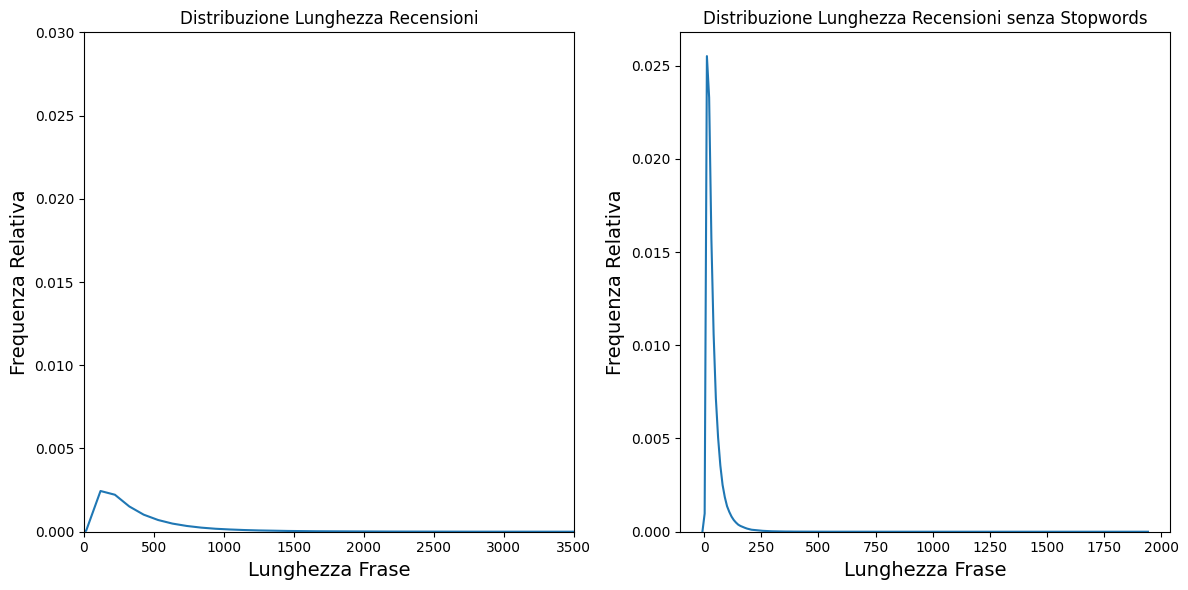

In [ ]:
ab = [WordPunctTokenizer().tokenize(j) for j in norm_df["Text"]]
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  

sns.kdeplot([len(s) for s in  norm_df['Text']], ax=ax[0])
ax[0].set_title('Distribuzione Lunghezza Recensioni')
ax[0].set_ylabel("Frequenza Relativa", size = 14)
ax[0].set_xlabel("Lunghezza Frase", size = 14)
ax[0].set_xlim(0, 3500) 
ax[0].set_ylim(0, 0.03) 

sns.kdeplot([len(s) for s in norm_df['Text'].apply(remove_stopwords)], ax=ax[1])
ax[1].set_title('Distribuzione Lunghezza Recensioni senza Stopwords')
ax[1].set_ylabel("Frequenza Relativa", size = 14)
ax[1].set_xlabel("Lunghezza Frase", size = 14)
ax[0].set_xlim(0, 3500) 
ax[0].set_ylim(0, 0.03) 

plt.tight_layout() 
plt.show()

In [ ]:
norm_df['Text'] = norm_df['Text'].apply(remove_stopwords)

In [ ]:
norm_df[['Text']]

,Text
0,"[bought, several, vitality, canned, dog, food,..."
1,"[arrived, labeled, jumbo, salted, peanutsthe, ..."
2,"[confection, around, centuries, light, pillowy..."
3,"[looking, secret, ingredient, robitussin, beli..."
4,"[great, taffy, great, price, wide, assortment,..."
...,...
393670,"[great, sesame, chickenthis, good, not, better..."
393671,"[disappointed, flavor, chocolate, notes, espec..."
393672,"[stars, small, give, one, training, session, t..."
393673,"[best, treats, training, rewarding, dog, good,..."


In [ ]:
norm_df.to_csv('normalized_reviews_nolem.csv', index=False)

In [5]:
norm_df = pd.read_csv("normalized_reviews_nolem.csv")

### Lemmatization

Lemmatization vs. Stemming:

**Stemming**:
Involves removing suffixes to obtain word roots.
Resulting stems may not be actual words and could lack meaning.
Generally faster, suitable for large datasets or real-time applications.
May lead to overstemming or understemming.

**Lemmatization**:
Reduces words to their base or dictionary form (lemma).
Produces meaningful and grammatically correct lemmas.
Requires access to a lexicon, potentially slower than stemming.
Preferred for linguistic precision and applications where word meaning is crucial.

Why Choose Lemmatization:
Better Quality: Higher quality results with meaningful lemmas.
Linguistic Precision: Preserves word meaning accurately.
Contextual Understanding: Considers context and part-of-speech information.
Downstream Applications: Beneficial for tasks where word meaning is crucial.
Choose lemmatization when linguistic precision and maintaining the meaning of words are essential for your specific natural language processing task.

In [6]:
norm_df["Text"] = norm_df["Text"].apply(ast.literal_eval)

In [14]:
lemmatizer = WordNetLemmatizer()

def lemmatize_first(words):
    lemmatized_words = [lemmatizer.lemmatize(word, 'v') for word in words]
    return lemmatized_words

def lemmatize_second(words):
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return lemmatized_words

norm_df['Text'] = norm_df['Text'].apply(lemmatize_first)
norm_df['Text'] = norm_df['Text'].apply(lemmatize_second)

In [16]:
norm_df[["Text"]]

,Text
0,"[buy, several, vitality, can, dog, food, produ..."
1,"[arrive, label, jumbo, salt, peanutsthe, peanu..."
2,"[confection, around, century, light, pillowy, ..."
3,"[look, secret, ingredient, robitussin, believe..."
4,"[great, taffy, great, price, wide, assortment,..."
...,...
393665,"[great, sesame, chickenthis, good, not, better..."
393666,"[disappoint, flavor, chocolate, note, especial..."
393667,"[star, small, give, one, train, session, try, ..."
393668,"[best, treat, train, reward, dog, good, groom,..."


## Output ready for the models

In [18]:
df_processed = norm_df[['Summary', 'Text', 'Score']]

In [19]:
df_processed['Y'] = (norm_df['Score'] > 3).astype(int)
df_processed

,Summary,Text,Score,Y
0,Good Quality Dog Food,"[buy, several, vitality, can, dog, food, produ...",5,1
1,Not as Advertised,"[arrive, label, jumbo, salt, peanutsthe, peanu...",1,0
2,"""Delight"" says it all","[confection, around, century, light, pillowy, ...",4,1
3,Cough Medicine,"[look, secret, ingredient, robitussin, believe...",2,0
4,Great taffy,"[great, taffy, great, price, wide, assortment,...",5,1
...,...,...,...,...
393665,Will not do without,"[great, sesame, chickenthis, good, not, better...",5,1
393666,disappointed,"[disappoint, flavor, chocolate, note, especial...",2,0
393667,Perfect for our maltipoo,"[star, small, give, one, train, session, try, ...",5,1
393668,Favorite Training and reward treat,"[best, treat, train, reward, dog, good, groom,...",5,1


In [20]:
df_processed.to_csv('processed_reviews.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a1b052e0-2ae7-4808-9f70-51bfe2ee192f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>